Набор данных содержит оценки степени согласия респондентов с высказываниями,
отражающими цель потребления леденцов. Всего каждый респондент выставлял оценки по 
11 высказываниям:

- V1: Я потребляю леденцы, чтобы освежить дыхание
- V2: Я потребляю леденцы, чтобы чувствовать себя увереннее
- V3: Я потребляю леденцы, чтобы освежить полость рта
- V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту
- V5: Я потребляю леденцы как заменитель других кондитерских изделий
- V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого
- V7: Леденцы помогают мне сконцентрироваться
- V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать
- V9: Я потребляю леденцы для того, чтобы облегчить боль в горле
- V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа
- V11: Я потребляю леденцы для улучшения самочувствия

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
file_path = 'Леденцы.dat'

# Чтение данных и создание датафрейма
df = pd.read_csv(file_path, sep=';')

# Вывод первых 10 строк датафрейма
print(df.head(10))

num_rows = df.shape[0]

print('Количество наблюдений:', num_rows)

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0   4   5   5   5   3   3   3   3   3    3    3
1   5   4   5   5   3   3   3   3   3    3    3
2   5   5   4   5   3   3   3   3   3    3    3
3   5   4   5   5   3   3   3   3   3    3    3
4   4   5   5   5   3   3   3   3   3    3    3
5   5   4   5   5   3   3   3   3   3    3    3
6   5   5   4   5   3   3   3   3   3    3    3
7   5   4   5   5   3   3   3   3   3    3    3
8   5   5   5   5   3   3   3   3   3    3    3
9   5   4   5   4   3   3   3   3   3    3    3
Количество наблюдений: 338


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


**Иерархиеский кластерный анализ**

Эта процедура предназначена для выявления относительно однородных групп наблюдений (или переменных) по заданным характеристикам при помощи следующего алгоритма: 

- Каждое наблюдение образовывает сначала свой отдельный кластер.
- На первом шаге анализа два соседних кластера объединяются в один.
- Этот процесс продолжается до тех пор, пока не останутся только два кластера.
- Расстояние между кластерами является средним значением всех расстояний между всеми возможными парами точек из обоих кластеров.

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Функция linkage используется для создания иерархической структуры кластеров на основе входных данных.

In [5]:
# Кластеризуем:
link = linkage(df, 'ward', 'euclidean')

В объекте ```link```  хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

'ward': Определяет метод объединения (linkage method), является одним из популярных методов объединения в иерархической кластеризации. Метод Ward стремится минимизировать дисперсию внутри кластеров, когда объекты объединяются в более крупные кластеры.

'euclidean': Указывает на метрику расстояния, которая будет использоваться для измерения расстояния между объектами - метрика Евклида, которая измеряет расстояние между точками в n-мерном пространстве.

In [6]:
print(type(link))
print(link.shape)
link

<class 'numpy.ndarray'>
(337, 4)


array([[  0.        ,   4.        ,   0.        ,   2.        ],
       [  1.        ,   3.        ,   0.        ,   2.        ],
       [  2.        ,   6.        ,   0.        ,   2.        ],
       ...,
       [664.        , 669.        ,  30.21829021, 120.        ],
       [667.        , 672.        ,  43.44161878, 230.        ],
       [671.        , 673.        ,  51.70554708, 338.        ]])

Дендрограмма - графическое представление иерархической структуры кластеров.

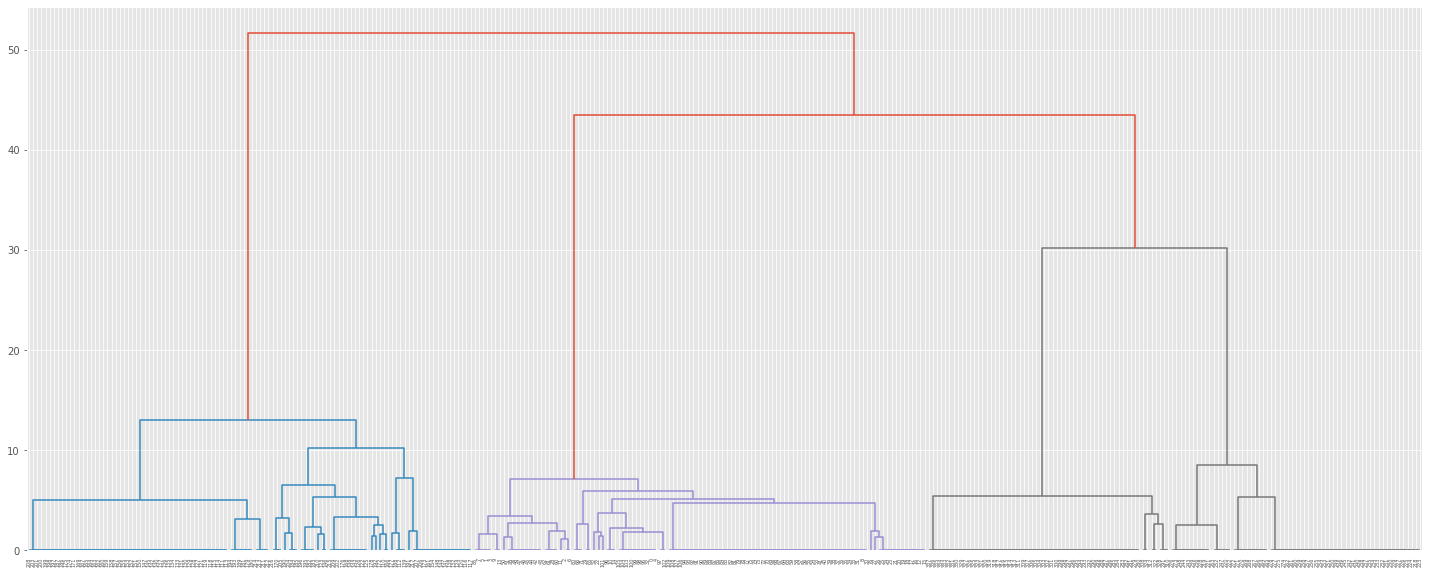

In [7]:
# Вариант 1: Пороговое значение определяется по формуле h = 0.7*max(link[:,2])
fig = plt.figure(figsize=(25,10))
dn = dendrogram(link, labels= df.index.tolist())

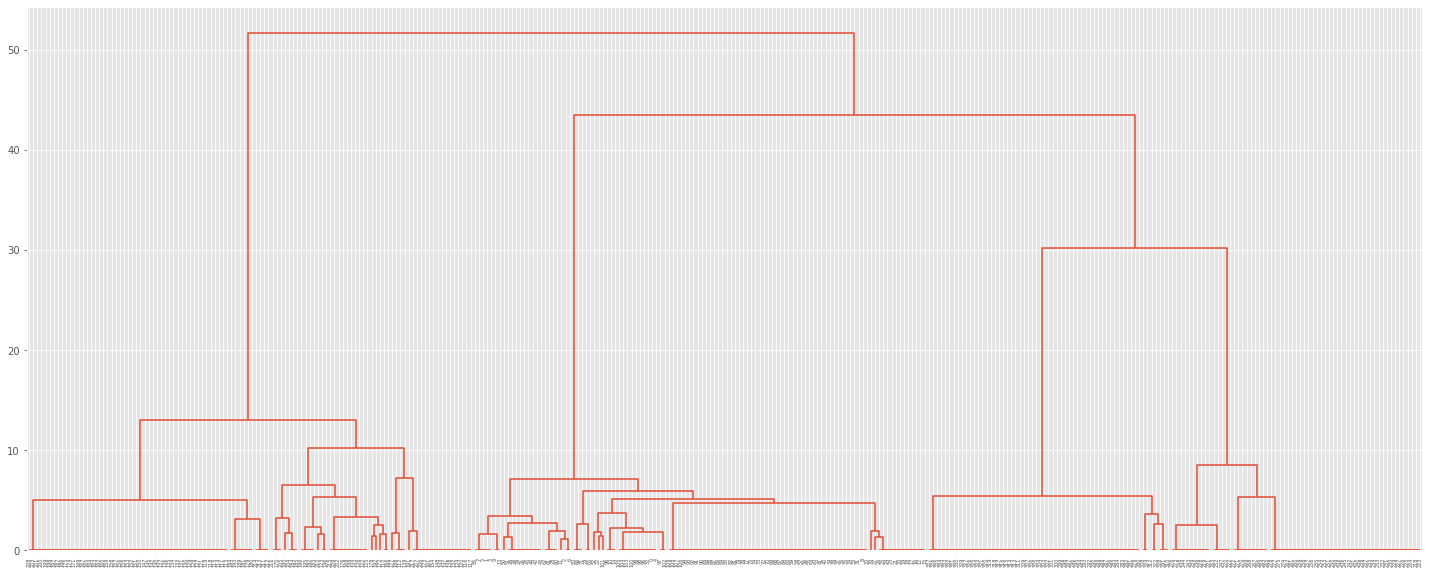

In [8]:
# Вариант 2: Убираем автоматическое определение числа кластеров
fig = plt.figure(figsize=(25,10))
dn = dendrogram(link, color_threshold = -1,                 
                labels=df.index.tolist())

График "каменистая осыпь".

На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага объединения (обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться. 

В основе метода локтя лежит идея: чтобы идентифицировать значение k в точке, где искажение начинает увеличиваться быстрее всего, что станет понятнее, если мы построим график искажения для разных значений k:

График особенно полезен, если данных много. Будем использовать второй столбец матрицы link где хранятся расстояния между объединяемыми кластерами.

Так как данных достаточно много покажем на графике не все слияния, а только 40 последних.

In [9]:
dist = link[:, 2]
dist

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Text(0, 0.5, 'Расстояние')

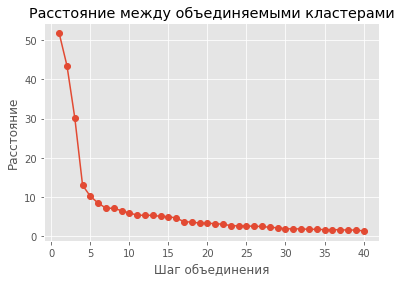

In [10]:
dist_rev = dist[-40:][::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Из графика видно, что если остановить объединение кластеров при расстоянии равном 13, мы получим 4 кластера.

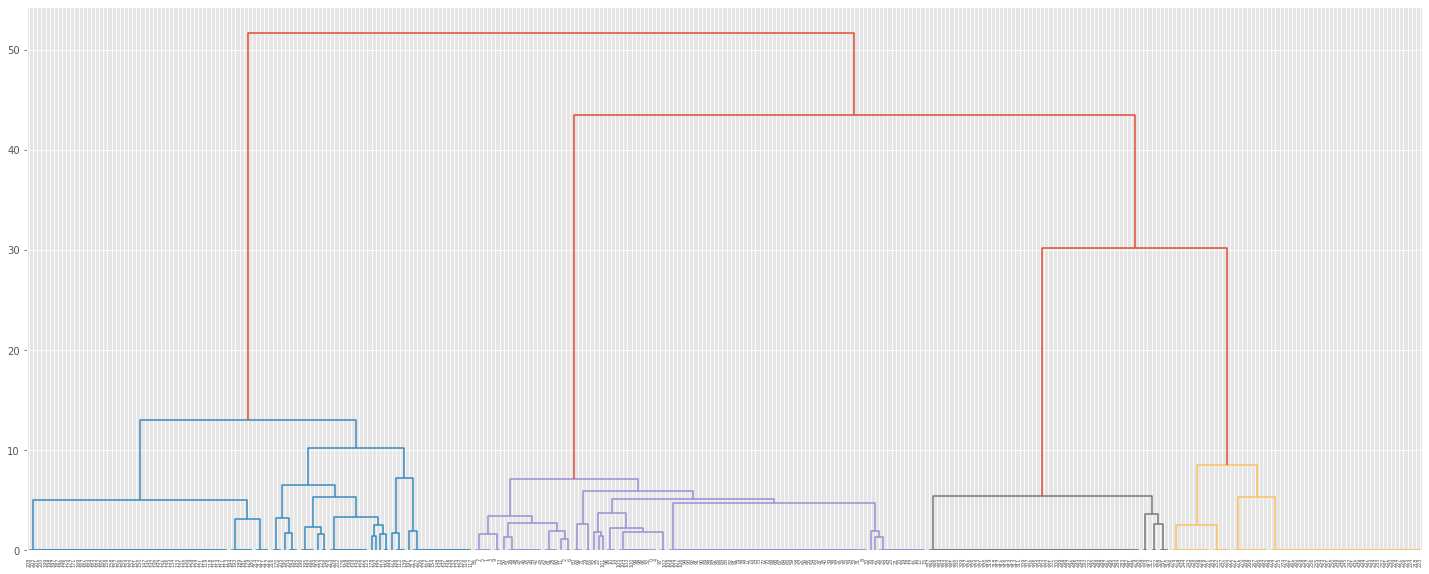

In [11]:
# Вариант 3: Зададим порог для расстояния = 15, в таком случае выделяются 4 кластера

fig = plt.figure(figsize=(25,10))

dn = dendrogram(link, color_threshold = 15, labels=df.index.tolist())

Добавим к таблице данных df столбец cluster, содержащий код того кластера, в который попал объект. Это сделаем с помощью команды fcluster.

In [12]:
# Останавливаем объединение, когда расстояние между кластерами превысит 15
df['cluster'] = fcluster(link, 15, criterion='distance')
print(df)

     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  cluster
0     4   5   5   5   3   3   3   3   3    3    3        2
1     5   4   5   5   3   3   3   3   3    3    3        2
2     5   5   4   5   3   3   3   3   3    3    3        2
3     5   4   5   5   3   3   3   3   3    3    3        2
4     4   5   5   5   3   3   3   3   3    3    3        2
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...      ...
333   3   3   3   3   3   3   5   5   3    3    3        3
334   3   3   3   3   3   3   5   5   3    3    3        3
335   3   3   3   3   3   3   5   5   3    3    3        3
336   3   3   3   3   3   3   5   5   3    3    3        3
337   3   3   3   3   3   3   5   5   3    3    3        3

[338 rows x 12 columns]


Сравним типичные объекты в разных кластерах. Посмотрим, по каким переменным различаются кластеры.

Для этого сгруппируем данные по номеру кластера, а затем в каждой группе вычислим средние значения каждой характеристики.
Используем стандартную конструкцию: вызов метода groupby с последующим применением функции к группам.

In [13]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [14]:
df['cluster_2'] = fcluster(link, 5, criterion='maxclust')

In [15]:
#  Средние значения баллов в каждом кластере
df.groupby('cluster_2').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
cluster_2,,,,,,,,,,,,
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.932203,4.830508,4.898305,1.0
2,2.612245,2.632653,2.489796,2.163265,2.142857,2.081633,2.448980,2.816327,4.979592,4.795918,4.816327,1.0
3,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.0
4,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,3.0
5,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,4.0


In [16]:
# Количество наблюдений в каждом из кластеров:
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

Кластер 1:

Этот кластер имеет высокие значения V9, V10, V11.
Возможно, этот кластер описывает людей, которые используют леденцы как средство для облегчения симптомов боли в горле и заложенности носа.    
    
Кластер 2:

В этом кластере высокие значения у V1, V2, V3, V4.
Возможно, этот кластер описывает людей, которые используют леденцы в качестве средства для улучшения свежести дыхания и повышения уверенности.

Кластер 3:

Этот кластер характеризуется высокими значениями V7, V8.
Вероятнее всего, этот кластер описывает людей, которые используют леденцы как средство для улучшения концентрации и отвлечения.

Кластер 4:

Этот кластер характеризуется высокими значениями V5 и V6.
Возможно, этот кластер описывает людей, которые потребляют леденцы как альтернативу другим сладостям и когда им хочется чего-нибудь сладкого.

Используя иерархический метод кластеризации, было обнаружено, что в наборе данных 4 кластеров. Если увеличить количество кластеров до 6 происходит сильное разбиение. Если рассматривать 4 кластера исходя из логических соображений оценок и анализе дендрограммы, происходит следующее: при оценки расстояний между объектами мы замечаем дополнительный кластер, также среднее значение по оценкам при 5 кластерах более точное, чем при 4.

**Кластеризация методом k-средних (k-means)**

In [17]:
from sklearn.cluster import KMeans

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:
1. Инициализация модели, задание её параметров,
2. Подгонка модели (метод fit и/или fit_transform),
3. Предсказание для новых наблюдений (метод predict).


Для кластеризации методом k-means необходимо задать число кластеров k. 
Попробуем k = 4. 

In [18]:
# Максимальное число итераций: 
max_iter_1 = 30

In [19]:
# Инициализация модели:
model = KMeans(n_clusters=4, random_state=42, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )

# random_state - зерно датчика случайных чисел. 
# При повторных вызовах процедуры с тем же значением зерна random_state 
# модель будет давать одинаковые результаты.

In [20]:
model.fit(df)

KMeans(max_iter=30, n_clusters=4, random_state=42)

In [21]:
# Проверка:
if model.n_iter_ == max_iter_1:
    print("Не сошлось за", model.n_iter_ , "итераций") 
else:
    print("Сошлось за", model.n_iter_ , "итераций") 

Сошлось за 2 итераций


In [22]:
# Результат кластеризации набора данных из таблицы df
# Номера кластеров начинаются с 0, а не с 1, как в иерархическом кластерном анализе
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [23]:
# координаты центров кластеров
model.cluster_centers_

array([[2.82407407, 2.83333333, 2.76851852, 2.62037037, 2.61111111,
        2.58333333, 2.75      , 2.91666667, 4.9537037 , 4.81481481,
        4.86111111, 1.        , 1.4537037 ],
       [4.84545455, 4.8       , 4.83636364, 4.68181818, 3.03636364,
        3.03636364, 3.        , 2.99090909, 3.07272727, 3.04545455,
        3.04545455, 2.        , 3.        ],
       [3.        , 3.        , 3.        , 3.        , 4.85245902,
        4.85245902, 3.        , 2.91803279, 2.75409836, 2.75409836,
        2.75409836, 4.        , 5.        ],
       [3.        , 2.96610169, 2.96610169, 2.91525424, 2.91525424,
        2.94915254, 4.91525424, 4.91525424, 3.        , 3.        ,
        3.        , 3.        , 4.        ]])

Как определить число кластеров, не угадывая?
Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод inertia_ вернёт сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

C:\Users\79005\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


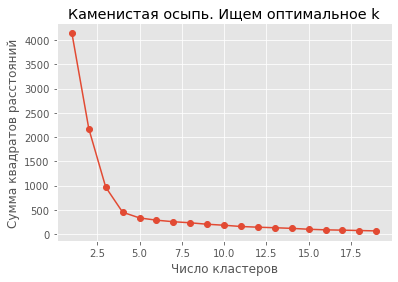

In [24]:
K = range(1, 20)

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Допустим, мы решили, что излом над числом 4.
Тогда 4 кластера -- это оптимальный выбор.
Перейдем к интерпретации кластеров, посмотрим, чем они отличаются друг от друга. Для этого применим метод labels_, а затем посчитаем средние значения переменных для каждого кластера.

In [25]:
# К таблице данных df добавим столбец cluster, содержащий код того кластера, в который попал объект.
df['cluster'] = model.labels_

df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_2
cluster,,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111,1.453704
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,3.000000
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,5.000000
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,4.000000


In [26]:
#  Подсчитаем объемы кластеров
df.groupby('cluster').size()

cluster
0    108
1    110
2     61
3     59
dtype: int64

Деление на 4 и 5 кластеров происходит похожим образом, как и в иерархическом методе. На данный момент деление на 5 и 4 кластеров является оптимальным. Произведем поиск кластеров третьим способ

**Кластеризация методом DBSCAN**

DBSCAN оперирует плотностью данных.

Кластеры - это плотные области в пространстве данных, разделенные областями с меньшей плотностью точек. Алгоритм DBSCAN основан на этом интуитивном понятии ”кластеров" и ”шума". Ключевая идея заключается в том, что для каждой точки кластера окрестности заданного радиуса должны содержать по крайней мере минимальное количество точек. 

Параметры, необходимые для алгоритма DBSCAN
- eps: определяет окрестности вокруг точки данных, т.е. если расстояние между двумя точками меньше или равно ‘eps’, то они считаются соседними. Если значение eps выбрано слишком малым, то большая часть данных будет рассматриваться как выброс. Если выбрано значение очень большое, то кластеры объединятся, и большинство точек данных будут находиться в одних и тех же кластерах.
- min_samples: минимальное количество соседей (точек данных) в радиусе eps. Чем больше набор данных, тем большее значение должно быть выбрано.

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
# Кластеризуем методом DBSCAN. 

# Значения 3-х первых параметров совпадают со значениями "по умолчанию"
# eps default=0.5; min_samples default=5; metric default=’euclidean’
dbscan_1 = DBSCAN()

# Обучим модель DBSCAN
dbscan_1.fit(df)

# Numpy массив номеров кластеров
dbscan_1.labels_

array([ 0,  1, -1,  1,  0,  1, -1,  1,  2, -1, -1, -1,  3, -1, -1,  3,  3,
        3,  3,  3,  3,  3, -1,  3,  3,  3,  3, -1, -1, -1,  2,  2,  0,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4, -1,
        4, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,  2,
        2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0, -1, -1,  0,  0,  0, -1,
       -1,  0,  0,  0,  2,  2,  2,  2, -1,  5, -1,  5,  5,  5,  6,  6,  5,
        5,  6,  5,  7, -1,  6,  7,  7,  5,  5,  5,  5,  5,  6,  5,  5,  5,
        5,  5,  6, -1,  5,  6,  5,  7,  6,  5, -1,  5,  6,  7,  5,  5,  5,
        5,  6,  5,  5,  5,  5,  5,  5,  6,  5,  5,  5,  5, -1,  5,  7,  5,
       -1,  5, -1,  6,  5,  5,  7, -1, -1,  8,  8,  8, -1, -1, -1, -1,  5,
        5, -1,  8, -1, -1, -1,  8,  8, -1, -1,  5,  5,  5,  5,  5,  7,  5,
       -1, -1,  6,  6,  5,  7, -1, -1, -1, -1, -1,  7, -1,  6,  9, 10, 11,
       10, 11,  9,  9,  9

Стандартные параметры метода приводят к разделению на большое число кластеров, и много значений из данных относятся к шуму

Поэкспериментируем с параметром eps, на данный момент нам нужно его увеличивать, чтобы уменить количество данных отнесенных к шуму

In [29]:
dbscan_2 = DBSCAN(eps=1, metric='euclidean', min_samples=5)

#  Обучим модель DBSCAN
dbscan_2.fit(df)

# В какой кластер попало наблюдение? 
# Numpy массив номеров кластеров

dbscan_2.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,  1,  1,  1,  2,  2,  1,
        1,  2,  1,  3, -1,  2,  3,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  2, -1,  1,  2,  1,  3,  2,  1, -1,  1,  2,  3,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1, -1,  1,  3,  1,
       -1,  1, -1,  2,  1,  1,  3, -1, -1,  4,  4,  4, -1, -1, -1, -1,  1,
        1, -1,  4, -1, -1, -1,  4,  4, -1, -1,  1,  1,  1,  1,  1,  3,  1,
       -1, -1,  2,  2,  1,  3, -1, -1, -1, -1, -1,  3, -1,  2,  5,  6,  6,
        6,  6,  5,  5,  5

In [30]:
#  Создаем таблицу частот в pandas 

#  Команда value_counts() работает с таблицами
#  Поэтому предварительно надо матрицу преобразовать в таблицу

table_ = pd.value_counts(pd.Series(dbscan_2.labels_))
table_.sort_index(inplace=True)

print(table_)

-1     44
 0    101
 1     49
 2     15
 3     10
 4      6
 5     37
 6     15
 7      9
 8     52
dtype: int64


In [31]:
dbscan_3 = DBSCAN(eps=3, metric='euclidean', min_samples=5)

#  Обучим модель DBSCAN
dbscan_3.fit(df)

# В какой кластер попало наблюдение? 
# Numpy массив номеров кластеров

dbscan_3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [32]:
table_ = pd.value_counts(pd.Series(dbscan_3.labels_))
table_.sort_index(inplace=True)

print(table_)

0    110
1    108
2    120
dtype: int64


Большой eps разделяет только на 3 класса, что является не оптимальным для представленной задачи. (Кластеров слишком мало) Уменьшим eps =2

In [33]:
dbscan_4 = DBSCAN(eps=2, metric='euclidean', min_samples=5)

#  Обучим модель DBSCAN
dbscan_4.fit(df)

# В какой кластер попало наблюдение? 
# Numpy массив номеров кластеров

dbscan_4.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2

In [34]:
table_ = pd.value_counts(pd.Series(dbscan_4.labels_))
table_.sort_index(inplace=True)

print(table_)

-1      4
 0    110
 1    104
 2     61
 3     59
dtype: int64


Сравним с результатами
иерархического кластерного анализа

In [35]:
# Создаю таблицу res_  с результатами разных кластеризаций

res_ = pd.DataFrame()

res_['dbscan_4'] = dbscan_4.labels_
res_['cluster']  = fcluster(link, 4, criterion='maxclust')

In [36]:
#  Таблица сопряженности для двух кластеризаций
tab = pd.crosstab(res_['dbscan_4'], res_['cluster'])

print(tab)

cluster     1    2   3   4
dbscan_4                  
-1          4    0   0   0
 0          0  110   0   0
 1        104    0   0   0
 2          0    0   0  61
 3          0    0  59   0


In [37]:
df_2 = df.copy()

In [38]:
df_2['cluster'] = fcluster(link, 4, criterion='maxclust')

In [39]:
df_2.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster_2
cluster,,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111,1.453704
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,3.000000
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,4.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,5.000000


In [40]:
df_3 = df.copy()

In [41]:
df_3['dbscan_4'] = dbscan_4.labels_

In [42]:
df.groupby(df_3['dbscan_4']).mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster,cluster_2
dbscan_4,,,,,,,,,,,,,
-1,2.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,4.750000,4.750000,0.0,2.000000
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,1.0,3.000000
1,2.855769,2.788462,2.721154,2.567308,2.634615,2.605769,2.778846,2.913462,4.951923,4.817308,4.865385,0.0,1.432692
2,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,2.0,5.000000
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,3.0,4.000000


Выводы:
    
Исходя из логических размышлений и результатов исследования оптимальное количество кластеров -- 4. Но также возможно рассмотрение деления на 5 кластеров. Более точно определить разделение на кластеры поможет дальнейшее исследование.

Лучший метод по метрикам и выбору кластеров можно считать DBSCAN с eps=2, но стоит отметить, что данный метод кластеризации достаточно сложный и требует дополнительных исследований параметра eps для правильной оценки кластеров.

Если имеем дело с большим количеством данных лучше использовать DBSCAN. Иерархический метод для работы с большим объемом данных не подходит, так как построение дендограммы довольно долгий процесс.